# 1. PROBLEM STATEMENT

Presented by: Rolando López

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

**Rolando's interpretation of the problem statement**

The main challenge here is the overwhelming amount of stock news out there – it's really hard for analysts to process it all and figure out the market sentiment (positive, neutral, negative) and how it affects stock prices.

Our project is about building an AI system for an investment startup. We're using historical news and stock data to automatically classify the sentiment of news articles and create weekly summaries. The goal is to give financial analysts clearer, actionable insights to help improve stock price predictions and make smarter investment decisions using our models.

# 2. ENV PREP

## 2.1. additional instructions

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

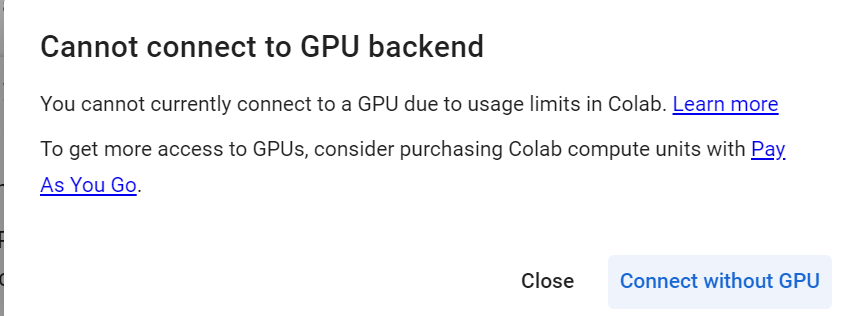

## 2.2. Libraries

### 2.2.1 Installing libraries (part 1)

In [ ]:
# # installing the sentence-transformers and gensim libraries for word embeddings

!pip install -U --no-cache-dir sentence-transformers gensim transformers tqdm scikit-learn pandas numpy matplotlib seaborn -q

### 2.2.2. Importing libraries (part 1)

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

### 2.2.3. Installing libraries (part 2)

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.40 --force-reinstall --no-cache-dir -q

# other versions tested
#0.1.78
#0.2.40

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 115.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 162.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 280.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 290.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 319.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 282.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which

### 2.2.4. Importing libraries (part 2)

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

### 2.2.5. Printing libraries' current versions



In [ ]:
!pip list | grep gensim
!pip list | grep transformers
!pip list | grep scikit-learn
!pip list | grep numpy
!pip list | grep pandas
!pip list | grep matplotlib
!pip list | grep seaborn

gensim                                4.3.3
sentence-transformers                 4.1.0
transformers                          4.51.3
scikit-learn                          1.6.1
numpy                                 2.2.5
geopandas                             1.0.1
pandas                                2.2.3
pandas-datareader                     0.10.0
pandas-gbq                            0.28.1
pandas-stubs                          2.2.2.240909
sklearn-pandas                        2.2.0
matplotlib                            3.10.3
matplotlib-inline                     0.1.7
matplotlib-venn                       1.1.2
seaborn                               0.13.2


## 2.3. Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the csv file
stock_news_orig = pd.read_csv("/content/drive/MyDrive/Education/DBA AI/M06 NLP/project 06_Stock mkt news/stock_news.csv")

#Creating a copy of the dataset
data = stock_news_orig.copy()

## 2.4. Globals

In [ ]:
# variables to be used across the notebook
gbl_random_seed = 42

# 3. DATA OVERVIEW

In [ ]:
# looking at the first 5 rows
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# shape of the dataset
data.shape

(349, 8)

In [ ]:
# data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [ ]:
# changing the type of the column
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# stats of the dataset
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,349,2019-02-16 16:05:30.085959936,2019-01-02 00:00:00,2019-01-14 00:00:00,2019-02-05 00:00:00,2019-03-22 00:00:00,2019-04-30 00:00:00,NaN
Open,349.0,46.229233,37.567501,41.740002,45.974998,50.7075,66.817497,6.442817
High,349.0,46.700458,37.817501,42.244999,46.025002,50.849998,67.0625,6.507321
Low,349.0,45.745394,37.305,41.482498,45.639999,49.7775,65.862503,6.391976
Close,349.0,44.926317,36.254131,40.246914,44.596924,49.11079,64.805229,6.398338
Volume,349.0,128948236.103152,45448000.0,103272000.0,115627200.0,151125200.0,244439200.0,43170314.918964
Label,349.0,-0.054441,-1.0,-1.0,0.0,0.0,1.0,0.715119


The dataset contains 349 entries covering January to April 2019. Stock prices (Open, High, Low, Close) range roughly from $ 36-67, averaging around $ 44-46. Trading Volume is highly variable, ranging from about 4.5 million to 244 million shares, with a mean around 128 million. The sentiment labels (-1, 0, 1) are present, with a slight overall bias towards negative or neutral sentiment in the dataset.

In [ ]:
# checking for null values
data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


there are no null values

In [ ]:
# checking for duplidated values
data.duplicated().sum()

0

no duplicated values

# 4. EXPLORATORY DATA ANALYSIS

## 4.1. Univariate Analysis

Observations on label

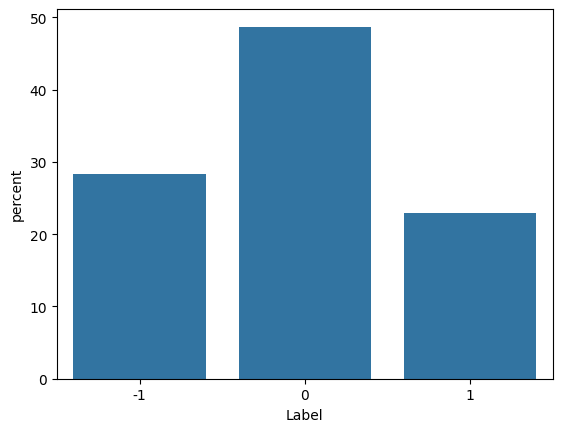

In [ ]:
sns.countplot(data=data, x="Label", stat="percent");

'Label' column is imbalanced, 0 is dominant at ~48%, while -1 and 1 are between 23-28% each

Observations on Price

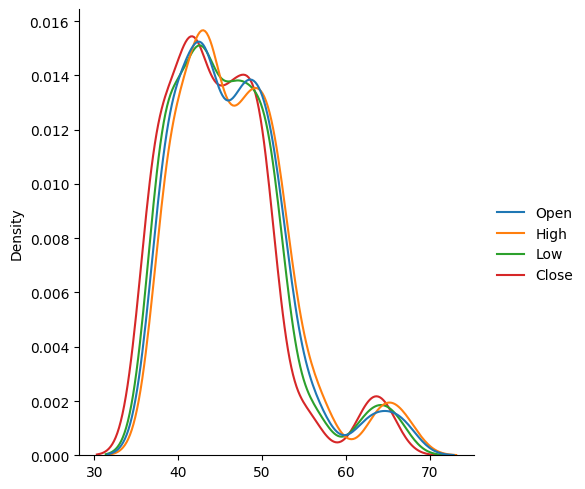

In [ ]:
sns.displot(data=data[['Open','High','Low','Close']], kind="kde", palette="tab10");

The distributions of Open, High, Low, and Close prices are very similar and overlap significantly, suggesting relatively consistent and narrow daily price ranges. There's a slight bimodal shape, that indicates the stock spent time trading in two distinct price bands during the dataset's period.

Observations on Volume

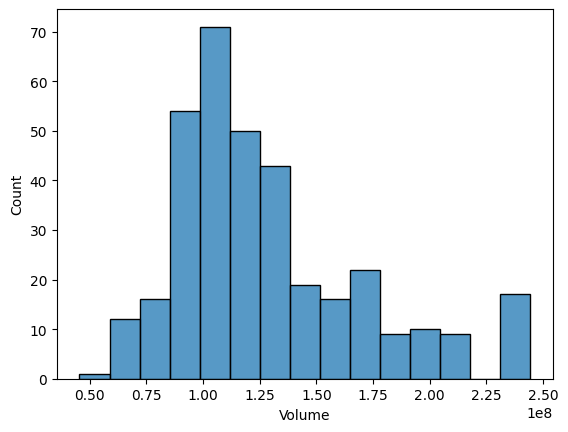

In [ ]:
sns.histplot(data, x='Volume');

The distribution of trading volume is right-skewed, showing that most days have moderate volume, but there are infrequent occurrences of much higher trading activity. These volume spikes likely correspond to specific events driving increased market interest.

Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
data['news_len'] = data['News'].apply(lambda x: len(x.split(' ')))

data['news_len'].describe() # statistical summary for the news content length

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


The stats of the length of the news are: 49 chars mean, with a minimum of 19 and max of 61 chars

## 4.2. Bivariate Analysis

Correlation

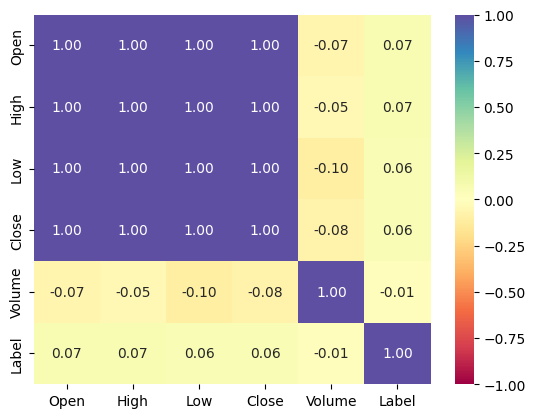

In [ ]:
data[['Open', 'High', 'Low', 'Close', 'Volume', 'Label']].corr()

sns.heatmap(
    data[['Open', 'High', 'Low', 'Close', 'Volume', 'Label']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

The correlation matrix confirms the strong relationship between the different price points in a day. Crucially, it shows that the sentiment label has very little linear correlation with the absolute price level. It also shows a weak positive linear correlation with volume, suggesting that while not a strong linear relationship, there's a slight tendency for volume to be higher when sentiment moves away from -1 towards 1, but the box plot for volume provides a clearer picture that both positive and negative sentiments drive volume higher than neutral. The matrix indicates the relationships are largely non-linear or weak linearly, particularly concerning the sentiment label's link to price.

Label vs Price

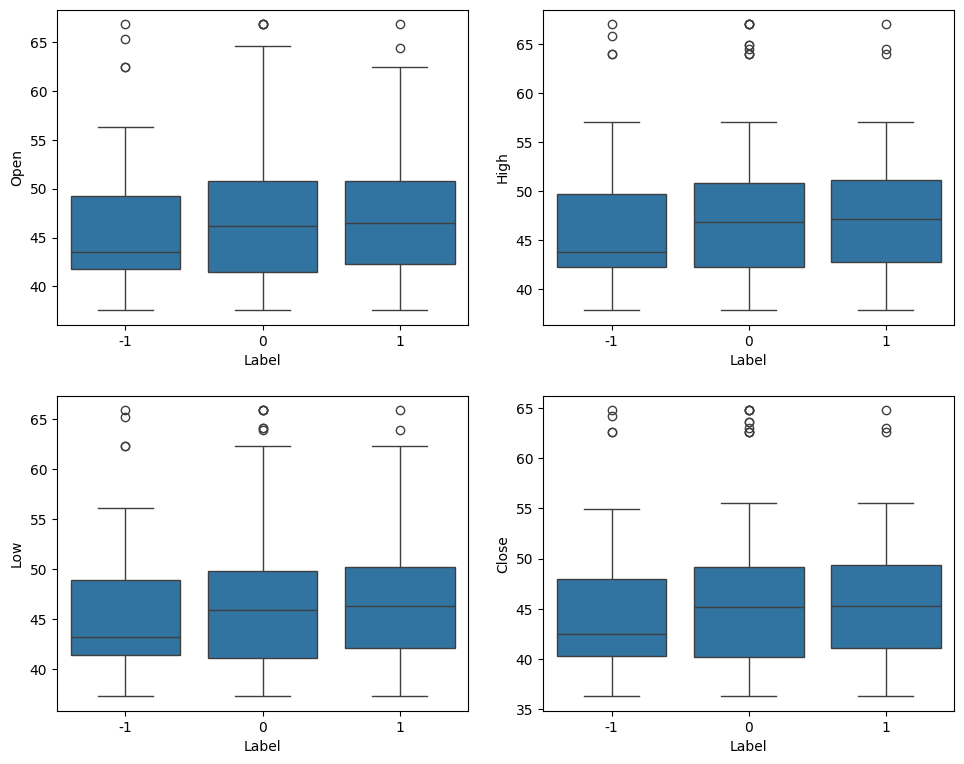

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

The box plots reveal that while there might be a slight upward trend in median prices from negative to positive sentiment, the overall distributions for each price type (Open, High, Low, Close) are very similar across all three sentiment labels. The interquartile ranges (boxes) and whiskers largely overlap.

This suggests that the absolute price level of the stock is not strongly differentiated by the sentiment of the news on that day. While sentiment might influence price movement (change from the previous day), it doesn't appear to strongly correlate with the absolute price range the stock is trading at when the news is released.

Label vs Volume

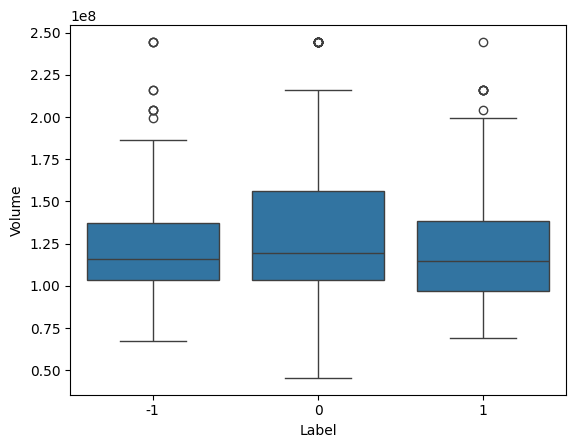

In [ ]:
sns.boxplot(data=data, x="Label", y="Volume");

The boxes and whiskers for positive and negative sentiment show higher volume ranges than neutral days.
This strongly suggests that news with a distinct positive or negative sentiment tends to generate higher trading activity (volume) than days with neutral or routine news. Significant news, whether good or bad, appears to drive more investor action than the absence of clear sentiment drivers.

Date vs Price

In [ ]:
# Group the 'stocks' DataFrame by the 'Date' column

stock_daily = data.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


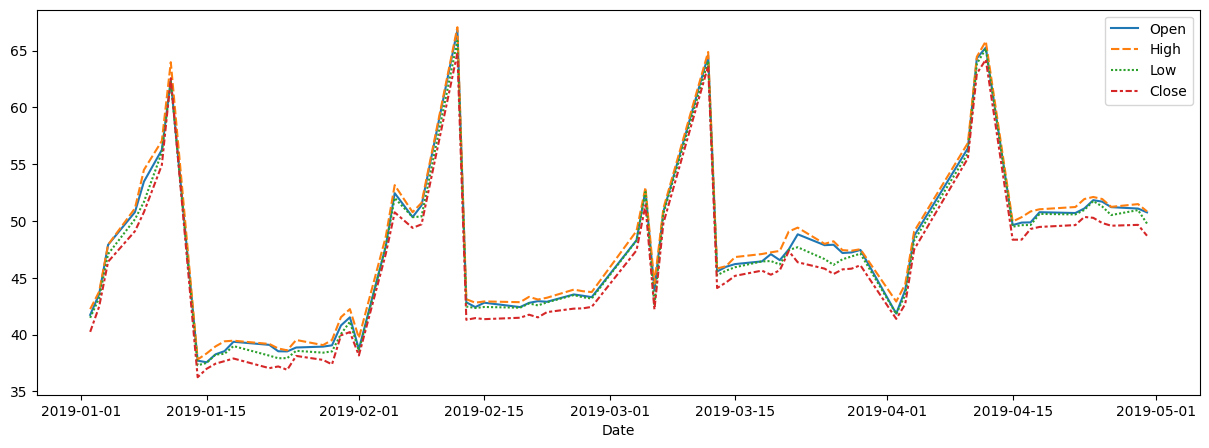

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

All four price lines track each other extremely closely throughout the period.
Insight: This visual confirms the earlier observation from the KDE plot that the difference between the Open, High, Low, and Close prices within a single day is generally small relative to the overall movement of the stock price over several days or weeks. It shows that daily volatility (the range within a day) is relatively contained during this period, despite the price itself undergoing noticeable trends and fluctuations.

Volume vs Close Price

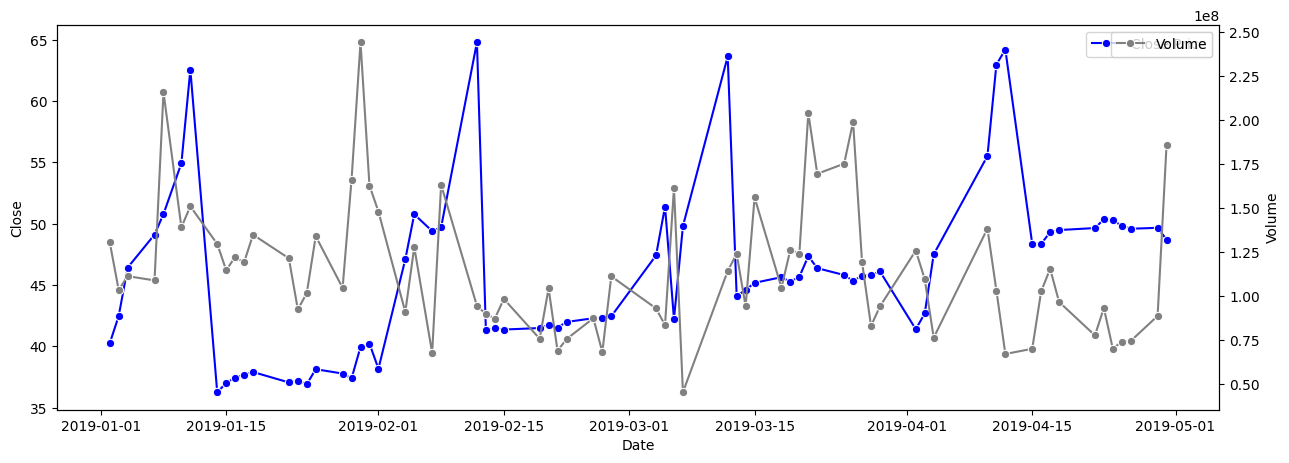

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

By comparing the Close Price (blue line) movements with the Volume (grey line) fluctuations, we can observe their relationship. There appears to be a strong tendency for significant price changes or periods of increased price volatility in the Close Price (sharp movements or turns in the blue line) to coincide with spikes in Volume (peaks in the grey line). This suggests that when the stock price makes notable moves, whether up or down, it's often backed by higher trading activity and market participation, compared to days where the price is more stable and volume is lower.

# 5. DATA PREPROCESSING

## 5.1. Train-test-validation split

In [ ]:
# separating predictors from label
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=gbl_random_seed, stratify=y)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=gbl_random_seed, stratify=y_temp)

print("Train data shape is: ", X_train.shape, ", Validation data shape is: ",
X_val.shape, ", Test data shape is: ", X_test.shape)

print("Train label shape is: ", y_train.shape, ", Validation label shape is: ", y_val.shape, ", Test label shape is: ", y_test.shape)

Train data shape is:  (244, 8) , Validation data shape is:  (52, 8) , Test data shape is:  (53, 8)
Train label shape is:  (244,) , Validation label shape is:  (52,) , Test label shape is:  (53,)


# 6. WORD EMBEDDINGS

## 6.1. Word2Vec

In [ ]:
# Creating a list of all words in our dataset
words_list = [item.split(" ") for item in data['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([-3.60552734e-03,  3.75152379e-02,  8.67900904e-03,  1.16152335e-02,
        6.16652193e-04, -5.68401217e-02,  2.95417458e-02,  8.87997746e-02,
        3.70907830e-03, -2.10442599e-02,  6.62047789e-03, -2.11855937e-02,
       -5.00079151e-03,  1.54764205e-02, -2.58149300e-02, -2.55615730e-02,
        2.20414177e-02, -3.41607723e-03,  5.76064130e-03, -2.61103716e-02,
       -2.28942856e-02,  7.79024651e-03,  2.99761817e-02,  1.53650576e-02,
        2.43012439e-02,  5.26128453e-04, -3.56147662e-02,  9.38795879e-03,
       -2.87450999e-02, -4.04495075e-02,  1.04256403e-02, -2.73104962e-02,
        3.91019043e-03, -9.68637317e-03, -1.94812252e-03,  2.32211873e-02,
        1.30461836e-02, -3.39261964e-02, -2.43379851e-03, -1.26176728e-02,
       -1.96498167e-02,  4.24254220e-03,  5.80444233e-04, -2.09361408e-02,
        2.00255159e-02,  3.78683582e-02,  8.48372839e-03,  1.69585627e-02,
       -3.05563939e-04,  2.32116692e-02,  1.16562890e-02, -1.11516826e-02,
       -2.21364684e-02,  

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([-1.08419312e-03,  5.17156720e-03,  3.28308856e-03,  1.89649127e-03,
       -1.21265720e-03, -1.12755271e-02,  6.77801808e-03,  1.57075226e-02,
       -1.98244979e-03, -2.02365522e-03, -2.34696874e-03, -3.50481109e-03,
        7.45038269e-04, -2.20140704e-04, -4.24796343e-03, -1.51149696e-03,
        7.02976715e-03,  2.00308673e-03,  3.59008764e-03, -2.87491502e-03,
       -5.78742707e-03,  2.76061730e-03,  3.99027439e-03, -7.82807590e-04,
        1.22053165e-03, -1.23992085e-03, -7.10784551e-03,  2.39096070e-03,
       -6.61150273e-03, -9.52598546e-03, -1.93554803e-03, -6.54514413e-03,
        2.79662828e-03, -2.82211788e-03, -2.70032161e-03,  5.88063523e-03,
       -8.68487987e-05, -5.29299490e-03, -4.61042255e-05, -2.98520806e-03,
       -5.66843478e-03,  8.53706209e-04,  1.50856772e-03, -3.91782448e-03,
        3.92284337e-03,  3.75915458e-03, -6.76601136e-04,  9.89668886e-04,
       -1.10036402e-04,  9.53599229e-04,  4.61896835e-03, -4.42899158e-03,
       -4.27390123e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

# dataset to be used for word2vec models
X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  2.0359890460968018


In [ ]:
print("train shape:", X_train_wv.shape, "; val shape:", X_val_wv.shape, "; test shape:", X_test_wv.shape)

train shape: (244, 300) ; val shape: (52, 300) ; test shape: (53, 300)


## 6.2. GloVe

In [ ]:
# load the Stanford GloVe model
filename = '/content/drive/MyDrive/Education/DBA AI/M06 NLP/project 06_Stock mkt news/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

# dataset to be used for GloVe models
X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column

end = time.time()
print('Time taken ', (end-start))

Time taken  26.344531297683716


In [ ]:
# printing the shapes of the final dataframes
print("train shape:", X_train_gl.shape, "; val shape:", X_val_gl.shape, "; test shape:", X_test_gl.shape)

train shape: (244, 100) ; val shape: (52, 100) ; test shape: (53, 100)


## 6.3. Sentence transformer

### 6.3.1. Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### 6.3.2. Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

# datasets for sentence transformer models
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) # apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) # apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) # apply Sentence Transformer on 'News' column

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.085937738418579


In [ ]:
print("train shape:", X_train_st.shape, "; val shape:", X_val_st.shape, "; test shape:", X_test_st.shape) # print the shapes of the final dataframes

train shape: (244, 384) ; val shape: (52, 384) ; test shape: (53, 384)


- Each news content has been converted to a 384-dimensional vector.

# 7. SENTIMENT ANALYSIS

F1-score will be used to select the best model because it balances Precision and Recall, which are both crucial. Precision measures the accuracy of positive predictions, while Recall measures how well the model finds all actual positives. Balancing these is essential for reliable sentiment classification, where both false positives and false negatives can be costly.

## 7.1. Utility functions

In [ ]:
def plot_confusion_matrix(model, predictors, target, dataset_name):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title("Confusion Matrix for dataset: " + dataset_name)  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

## 7.2. Base Model - Word2Vec

In [ ]:
# Building the model

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state= gbl_random_seed)
# base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

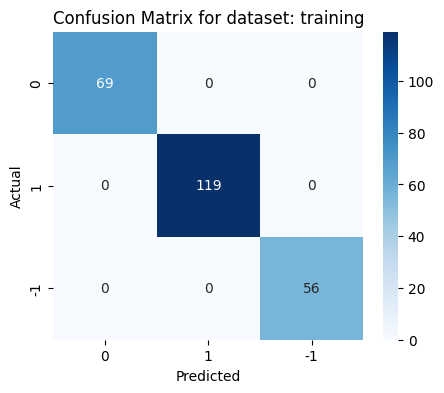

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train, "training")

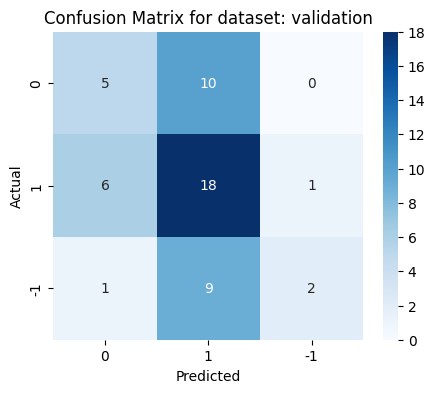

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val, "validation")

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.480769  0.480769   0.507926  0.447532


Model performance drops significantly on the validation data for all metrics (below 50%). The validation confusion matrix clearly shows many misclassifications across all classes. This indicates that the model is overfitting the training data.

This model is over

## 7.3. Base Model - GloVe

In [ ]:
#Building the model

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=gbl_random_seed)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train) # fit the chosen model on the train data

RandomForestClassifier(random_state=42)

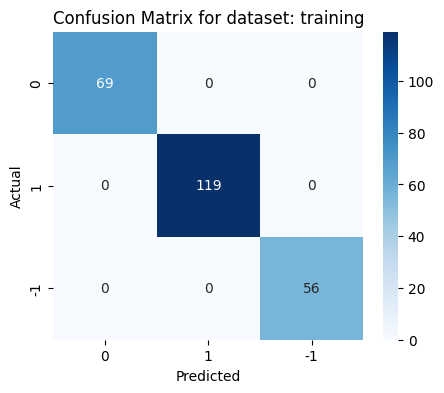

In [ ]:
plot_confusion_matrix(base_wv, X_train_gl, y_train, "training") # plot the confusion matrix for the train data

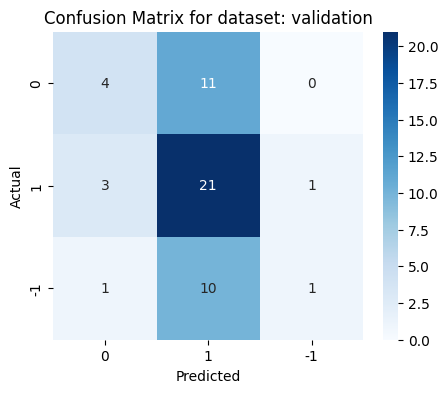

In [ ]:
plot_confusion_matrix(base_wv, X_val_gl, y_val, "validation") #plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_wv, X_train_gl, y_train) # compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_wv, X_val_gl, y_val) # compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy  Recall  Precision        F1
0       0.5     0.5        0.5  0.434679


This model's performance is not good either, it drops significantly on the validation data for all metrics (50% or less). The validation confusion matrix clearly shows many misclassifications across all classes. This indicates that the model is overfitting the training data.

## 7.4. Base Model - Sentence Transformer

In [ ]:
# Building the model

#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state= gbl_random_seed)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train) # fit the chosen model on the train data

RandomForestClassifier(random_state=42)

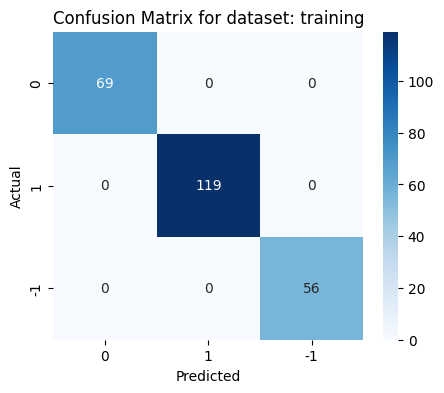

In [ ]:
plot_confusion_matrix(base_wv, X_train_st, y_train, "training") # plot the confusion matrix for the train data

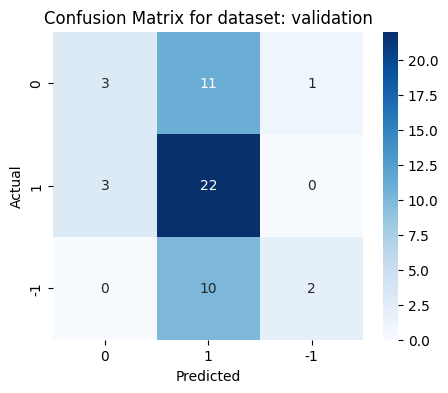

In [ ]:
plot_confusion_matrix(base_wv, X_val_st, y_val, "validation") # plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_wv, X_train_st, y_train) # compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_wv, X_val_st, y_val) # compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.519231  0.519231   0.544052  0.455042


This model did a little better than previous ones. However, performance still drops significantly on the validation data (45-51%). The validation confusion matrix clearly shows many misclassifications across all classes.

## 7.5. Tuned Model - Word2Vec

In [ ]:
start = time.time()

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state= gbl_random_seed)
#tuned_wv = DecisionTreeClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  123.45890092849731


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=5, max_features=0.4, min_samples_split=5,
                       random_state=42)

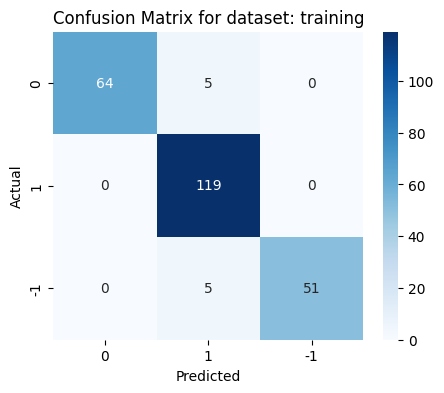

In [ ]:
plot_confusion_matrix(tuned_wv, X_train_wv, y_train, "training")

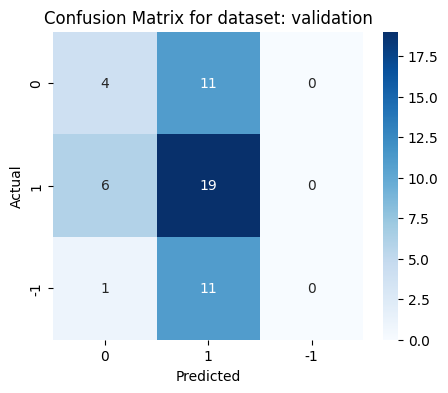

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val, "validation")

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.959016  0.959016   0.962193  0.958979


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.442308  0.442308   0.327691  0.365564


This model is overfitting and, on unseen data, is effectively failing to distinguish between negative, neutral, and positive sentiment, often defaulting to predicting 'positive'. This makes its performance on real-world, unseen data very poor, especially for identifying negative and neutral sentiment.

## 7.6. Tuned Model - GloVe

In [ ]:
start = time.time()

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=gbl_random_seed)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  71.72246098518372


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=5, random_state=42)

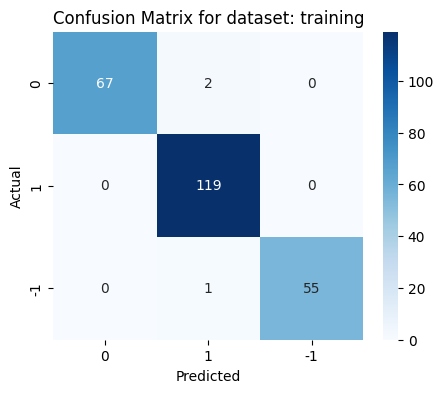

In [ ]:
plot_confusion_matrix(tuned_gl, X_train_gl, y_train, "training") # plot the confusion matrix for the train data

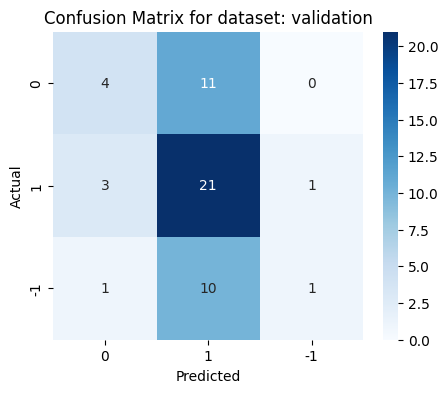

In [ ]:
plot_confusion_matrix(tuned_gl, X_val_gl, y_val, "validation") # plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_gl = model_performance_classification_sklearn(tuned_gl, X_train_gl, y_train)
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.987705  0.987705   0.988007  0.987703


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl, X_val_gl, y_val)
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy  Recall  Precision        F1
0       0.5     0.5        0.5  0.434679


With metrics between 43-50%, the performance of this model is slightly better than the previous one, however, it's still overfitting the training data. Model often defaults to predicting 'positive'. This makes its performance on real-world, unseen data very poor, especially for identifying negative and neutral sentiment.

## 7.7. Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state = gbl_random_seed)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  146.39013934135437


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=6, max_features=0.4, min_samples_split=7,
                       random_state=42)

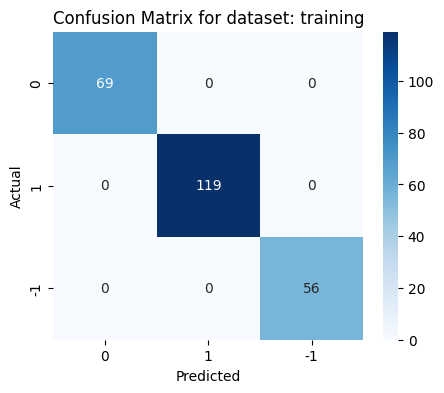

In [ ]:
plot_confusion_matrix(tuned_st, X_train_st, y_train, "training") #plot the confusion matrix for the train data

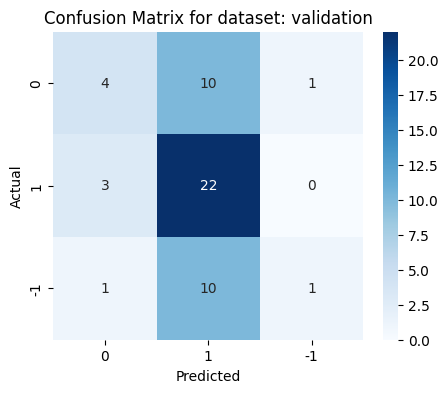

In [ ]:
plot_confusion_matrix(tuned_st, X_val_st, y_val, "validation") # plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st, X_train_st, y_train)
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st, X_val_st, y_val)
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.519231  0.519231   0.511447  0.449031


Similar to previous models, this model is overfitting the training data to a 100%, while the validation metrics are between 44-51%, which again shows poor generalization to unseen data.

## 7.8. Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),1.000000,1.000000,1.000000,1.000000
Base Model (GloVe),1.000000,1.000000,1.000000,1.000000
Base Model (Sentence Transformer),1.000000,1.000000,1.000000,1.000000
Tuned Model (Word2Vec),0.959016,0.959016,0.962193,0.958979
Tuned Model (GloVe),0.987705,0.987705,0.988007,0.987703
Tuned Model (Sentence Transformer),1.000000,1.000000,1.000000,1.000000


In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


,Accuracy,Recall,Precision,F1
Base Model (Word2Vec),0.480769,0.480769,0.507926,0.447532
Base Model (GloVe),0.500000,0.500000,0.500000,0.434679
Base Model (Sentence Transformer),0.519231,0.519231,0.544052,0.455042
Tuned Model (Word2Vec),0.442308,0.442308,0.327691,0.365564
Tuned Model (GloVe),0.500000,0.500000,0.500000,0.434679
Tuned Model (Sentence Transformer),0.519231,0.519231,0.511447,0.449031


### 7.8.1. Model Performance Check on Test Data

Model selected as final model is 'Tuned Model (GloVe)' = tuned_gl

We evaluated six models based on training and validation performance, prioritizing generalization to unseen data. Models achieving perfect training scores but poor validation results were excluded as severe overfitters.

Among the remaining models, 'Tuned Model (GloVe)' was selected as it achieved the highest F1-score (43%) on the validation dataset. While 43% validation F1 is a modest score, it represented the best generalization performance observed across all six evaluated models.

It's also interesing to note that this model (as well as others), have the exact metric values for 'accuracy' and 'recall', and a close value for 'precision'; which may be explained because the metrics are 'weighted'.

In [ ]:
final_model = tuned_gl
final_model_X_test = X_test_gl

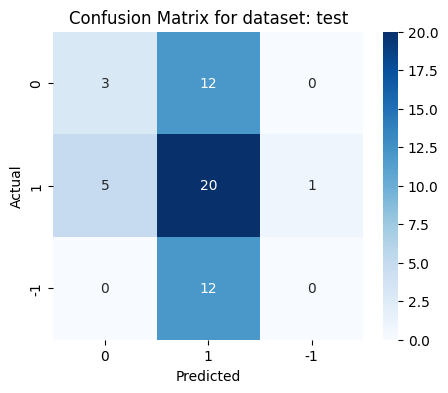

In [ ]:
plot_confusion_matrix(final_model, final_model_X_test, y_test, "test") #plot the confusion matrix for the final model and test data

In [ ]:
#Calculating different metrics on test data
final_model_per = model_performance_classification_sklearn(final_model, final_model_X_test, y_test)
print("Test performance:\n",final_model_per)

Test performance:
    Accuracy    Recall  Precision        F1
0  0.433962  0.433962   0.329117  0.354154


Accuracy of **43.4%** and an F1-score of **35.4%**. This indicates the model's current ability to classify sentiment reliably in real-world scenarios is limited.

Analysis of the confusion matrix reveals a significant challenge: the model exhibits a strong bias towards predicting **'Positive' sentiment**. It frequently misclassifies neutral news and critically, completely failed to identify **any actual negative news** in the test set, misclassifying all of it as positive.

This low performance, particularly the inability to detect negative sentiment, means the model is not yet reliable for informing investment decisions, and it's very clear that more effort is needed to improve its accuracy and generalization capability.

# 8. WEEKLY NEWS SUMMARIZATION

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

## 8.1. Installing and Importing the necessary libraries

...The code from these sections were moved to section 2

## 8.2. Loading the data

In [ ]:
# new dataset copy
data2 = stock_news_orig.copy()

## 8.3. Loading the model

In [ ]:
# loading the model from Hugging Face

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"


model_path = hf_hub_download(
    repo_id = model_name_or_path,
    filename = model_basename,
)


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

## 8.4. Aggregating the data weekly

In [ ]:
data2["Date"] = pd.to_datetime(data2['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data2.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Join the news values with ' || ' separator.

weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data3 = weekly_grouped.copy()

## 8.5. Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

### 8.5.1. Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

### 8.5.2. Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=500,
      temperature=0.1,
      top_p=0.5, #Complete the code to set the value for top_p
      top_k=5,
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

### 8.5.3. Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [ ]:
news = data3.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
# defining the prompt for the task "the task is to identify the top three positive and negative events from the week that are likely to impact the stock price"

prompt = f"""
You are a financial expert tasked with analyzing news articles and identifying key events that could significantly impact a company's stock price.

**Instructions:**

1. Analyze the provided news text for the week.
2. Identify the top 3 positive events and the top 3 negative events that are most likely to affect the stock price.
3. Focus on events with clear implications for the company's financial performance, strategic direction, or market position.


**Desired Output Format:**
Return a JSON object with the following structure:
{{ "positive_events": ["[Event 1]", "[Event 2]", "[Event 3]"], "negative_events": ["[Event 1]", "[Event 2]", "[Event 3]"] }}

"""

In [ ]:
data3
news

' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
# getting response from Mistral

%%time
summary = response_mistral_1(prompt, news)
print(summary)


llama_print_timings:        load time =     733.29 ms
llama_print_timings:      sample time =     241.26 ms /   242 runs   (    1.00 ms per token,  1003.05 tokens per second)
llama_print_timings: prompt eval time =    4954.54 ms /  3931 tokens (    1.26 ms per token,   793.41 tokens per second)
llama_print_timings:        eval time =   10037.25 ms /   241 runs   (   41.65 ms per token,    24.01 tokens per second)
llama_print_timings:       total time =   16935.10 ms /  4172 tokens


 {
          "positive_events": [
            "Roku Inc announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.",
            "The U.S. and China will hold their first face-to-face trade talks since agreeing to a 90-day truce in their trade war last month.",
            "The Chinese central bank announced a fifth reduction in the required reserve ratio (RRR) for banks, freeing up approximately 116.5 billion yuan for new lending."
          ],
          "negative_events": [
            "Apple cut its quarterly revenue forecast for the first time in over 15 years due to weak iPhone sales in China.",
            "Oil prices dropped on Thursday as investor sentiment remained affected by China's economic slowdown and turmoil in stock and currency markets.",
            "Apple's profit warning led to significant declines in U.S. stock indices, including the S&P 500, Dow Jones Industrial Average, and Nasdaq Composite."
    

### 8.5.4. Checking the model output on the weekly data

In [ ]:
# applying the function to get the Key news events

%%time
data3['Key Events'] = data3['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: prefix-match hit

llama_print_timings:        load time =     733.29 ms
llama_print_timings:      sample time =     146.77 ms /   242 runs   (    0.61 ms per token,  1648.87 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9695.15 ms /   242 runs   (   40.06 ms per token,    24.96 tokens per second)
llama_print_timings:       total time =   11034.90 ms /   243 tokens
 11%|█         | 2/18 [00:11<01:28,  5.53s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =     733.29 ms
llama_print_timings:      sample time =      87.56 ms /   170 runs   (    0.52 ms per token,  1941.59 tokens per second)
llama_print_timings: prompt eval time =    2603.28 ms /  2234 tokens (    1.17 ms per token,   858.15 tokens per second)
llama_print_timings:        eval time =    6237.61 ms /   169 runs

CPU times: user 3min 19s, sys: 4.89 s, total: 3min 24s
Wall time: 3min 26s


In [ ]:
# printing the first 5 rows
data3.head()

,Date,News,Key Events
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""positive_events"": [\n ..."
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""positive_events"": [\n ..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""positive_events"": [\n ..."
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""positive_events"": [\n ..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{ ""positive_events"": [""Apple reported spendin..."


In [ ]:
# printing the first 5 rows of the 'Key_Events' column
data3["Key Events"].head()

,Key Events
0,"{\n ""positive_events"": [\n ..."
1,"{\n ""positive_events"": [\n ..."
2,"{\n ""positive_events"": [\n ..."
3,"{\n ""positive_events"": [\n ..."
4,"{ ""positive_events"": [""Apple reported spendin..."


##### Formatting the model output

In [ ]:
# formatting the data
data3['model_response_parsed'] = data3['Key Events'].apply(extract_json_data)
data3.head()

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""positive_events"": [\n ...",{'positive_events': ['Roku Inc announced plans...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""positive_events"": [\n ...",{'positive_events': ['Sprint and Samsung plann...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""positive_events"": [\n ...",{'positive_events': ['Dialog Semiconductor rep...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""positive_events"": [\n ...",{'positive_events': ['IBM's stock price increa...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{ ""positive_events"": [""Apple reported spendin...",{'positive_events': ['Apple reported spending ...


In [ ]:
# parsing the positive events from the negative events
model_response_parsed = pd.json_normalize(data3['model_response_parsed'])

# showing the first 5 rows
model_response_parsed.head()

,positive_events,negative_events
0,[Roku Inc announced plans to offer premium vid...,[Apple cut its quarterly revenue forecast for ...
1,[Sprint and Samsung planning to release 5G sma...,[Geely forecasting flat sales for 2019 due to ...
2,[Dialog Semiconductor reported fourth quarter ...,[The U.S. stock market declined on Monday as c...
3,[IBM's stock price increased after hours due t...,"[The Swiss National Bank (SNB) governor, Andre..."
4,[Apple reported spending over $60 billion with...,[Caterpillar Inc reported lower-than-expected ...


In [ ]:
# getting the final dataframe with the week date, news, positive events and negative events

final_output = pd.concat([data3.reset_index(drop=True), model_response_parsed], axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

# showing the first 5 rows
final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,[Roku Inc announced plans to offer premium vid...,[Apple cut its quarterly revenue forecast for ...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,[Sprint and Samsung planning to release 5G sma...,[Geely forecasting flat sales for 2019 due to ...
2,2019-01-20,The U.S. stock market declined on Monday as c...,[Dialog Semiconductor reported fourth quarter ...,[The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",[IBM's stock price increased after hours due t...,"[The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,[Apple reported spending over $60 billion with...,[Caterpillar Inc reported lower-than-expected ...


# 9. CONCLUSIONS AND RECOMMENDATIONS

*   ***A. Executive Summary of Findings***


- Market Dynamics: Stock price fluctuations often align with trading volume spikes, particularly during non-neutral news events. While sentiment shows weak correlation with price levels, it’s more closely tied to market activity like volume and volatility.

- Data Characteristics: The dataset includes short news snippets (~49 characters) and corresponding stock data. Sentiment labels are imbalanced, skewed toward 'Neutral.'

- Model Prototyping: Six models were tested using various embeddings (GloVe, Sentence Transformer, Word2Vec), focusing on F1-score performance for generalization.

- Current Performance: The best model (tuned GloVe-based) reached a 43% F1-score on validation. However, it often misclassified neutral/negative news as positive and failed to detect negative sentiment accurately.


*   ***B. Implications for Investment Strategy***

The current model isn't reliable enough for use in investment decisions. Its tendency to over-predict positive sentiment undermines its ability to flag market-moving negative news effectively.


*   ***C. Proposed Next Steps & Recommendations***

- Improve Data & Signal Extraction:
  - Address class imbalance to better detect Positive and Negative news.
  - Adopt advanced contextual embeddings for richer semantic understanding.

- Boost Model Generalization:
  - Test alternative architectures better suited for sequential data.

- Deepen Error Analysis:
  - Analyze frequent misclassifications to uncover blind spots and refine feature engineering.

- Refine the Link Between Sentiment and Market Outcomes:
    - Based on the EDA, sentiment appears more strongly related to trading volume and price movement rather than absolute price levels. We should focus on using the predicted sentiment as a feature in models designed to predict price changes or volatility, aligning our approach with the observed market dynamics.

- Explore Leveraging Large Language Models (LLMs) as an Alternative: Investigate using powerful LLMs directly via prompting (zero-shot or few-shot learning) for sentiment classification. This approach could potentially be simpler and faster to implement compared to training models from scratch or extensively fine-tuning smaller models, as LLMs already possess vast linguistic understanding and some inherent sentiment analysis capabilities from their pre-training.


*   ***D. Conclusion***

Our analysis surfaces key challenges in generalization and sentiment detection. The next phase will apply more advanced techniques in data handling, embeddings, and modeling to create a sentiment tool capable of delivering actionable insights and supporting investment strategy. Or alternatively, classifying sentiment with an LLM is also a viable and straight forward solution.


<font size=6 color='blue'>Power Ahead</font>
___